In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ["PATH"] += os.pathsep + 'J:/graphViz/Graphviz 2.44.1/bin/'

# Create Example Datasets

In [157]:
ex1 = pd.DataFrame({'Xf' : [-4,-3,-2,-1,0,1,2,3,4], 'Xc' : [1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0], 'Y' : [4,3,2,1,0,1,2,3,4]})
def ex1_f(X, c=None): return np.array([[abs(x), 1.0 if x <= 0.0 else -1.0] for x in X]).T.tolist()

ex2 = pd.DataFrame({'Xf' : [-3.9,-3.1,-1.9,-1.1,0.1,1.1,1.9,3.1,4.1], 'Xc' : [1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0], 'Y' : [4.1,2.9,2.05,0.95,0.05,1.1,2.1,2.9,3.9]})
def ex2_f(X, c=None): return np.array([[abs(x) + np.random.normal(0.0,0.1), 1.0 if x <= 0.0 else -1.0] for x in X]).T.tolist()

ex3 = pd.DataFrame({'Xf' : [-4,-3,-2,-1,0,1,2,3,4,0.9,1.9,2.9,3.9], 'Xc' : [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0], 'Y' : [-4,-3,-2,-1,0,1,2,3,4,4,3,2,1]})
def ex3_f(X, c=None): return np.array([[x if c == 1.0 else -1.0*x + 4.9, c] for x in X]).T.tolist()

ex4 = pd.DataFrame({'Xf' : [-4,-3,-2,-1,0,1,2,3,4,0.9,1.9,2.9,3.9,-1.5,-0.5,0.5,1.5], 'Xc' : [1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,2.0,2.0,2.0,2.0], 'Y' : [-4,-3,-2,-1,0,1,2,3,4,4,3,2,1,1,0.5,0.,-0.5]})
def ex4_f(X, c=None): return np.array([[x if c == 1.0 else -1.0*x + 4.9 if c == -1.0 else -0.5*x+0.25, c] for x in X]).T.tolist()

In [164]:
def getColors(vals):
    ret = []
    for v in vals:
        if v == 1.0:
            ret.append('g')
        elif v == -1.0:
            ret.append('b')
        elif v == 2.0:
            ret.append('orange')
        else:
            ret.append('k')
    return ret

def plotDataset(data, func, title, cs=None):
    X = data[['Xf']].to_numpy()
    colors = getColors(data['Xc'])
    Y = data[['Y']].to_numpy()
    
    
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.scatter(X,Y,c=colors)
    
    if cs== None:
        Xlin = np.linspace(-4,4,100)
        Ylin,clin = func(Xlin)
        ax.scatter(Xlin,Ylin,c=getColors(clin), alpha=0.2, s=10)
    else:
        for c in cs:
            Xlin = np.linspace(-4,4,100)
            Ylin,clin = func(Xlin, c)
            ax.scatter(Xlin,Ylin,c=getColors(clin), alpha=0.2, s=10)
    plt.show()

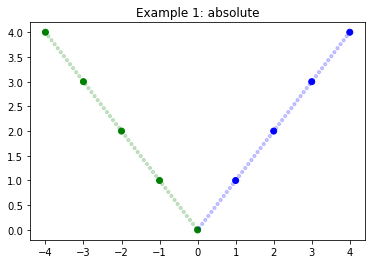

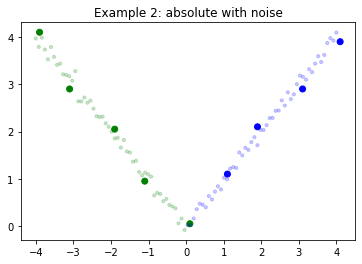

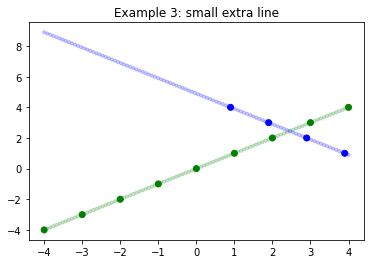

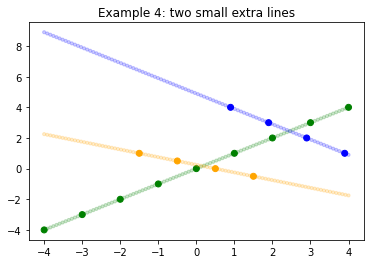

In [165]:
plotDataset(ex1, ex1_f, "Example 1: absolute")
plotDataset(ex2, ex2_f, "Example 2: absolute with noise")
plotDataset(ex3, ex3_f, "Example 3: small extra line", [1.0,-1.0])
plotDataset(ex4, ex4_f, "Example 4: two small extra lines", [1.0,-1.0,2.0])

# Model Trees

The model trees I use here are an open source implementation by Anson Wong (https://github.com/ankonzoid) and can be found here: https://github.com/ankonzoid/LearningX/blob/master/advanced_ML/model_tree

In [243]:
from model_tree.src.ModelTree import ModelTree
from model_tree.models.mean_regr import mean_regr
from model_tree.models.linear_regr import linear_regr
from model_tree.models.svm_regr import svm_regr

In [265]:
def getModelTreePrediction(data, model, max_depth = 2):
    X = data[['Xf', 'Xc']].to_numpy()
    Y = data[['Y']].to_numpy()
    
    modelTree = ModelTree(model, max_depth = max_depth, min_samples_leaf=1,search_type="greedy", n_search_grid=100)
    modelTree.fit(X,Y)
    pred = modelTree.predict(X)
    #modelTree.export_graphviz('tree', ['Xf','Xc'], export_png=True, export_pdf=False)
    return pred, modelTree
    
def plotDataAndPredictions_simple(data, preds):
    X = data[['Xf']].to_numpy()
    colors = getColors(data['Xc'])
    Y = data[['Y']].to_numpy()
    plt.scatter(X,Y,c=colors)
    plt.scatter(X,preds, c='r', alpha=0.3)
    plt.show()
    
def plotDataAndPredictions(data, model, useColors = False):
    X = data[['Xf']].to_numpy()
    colors = getColors(data['Xc'])
    Y = data[['Y']].to_numpy()
    plt.scatter(X,Y,c=colors)
    
    if not useColors:
        Xlin = np.linspace(-4,4,100)
        cs = np.unique(data['Xc'].to_numpy())
        Xdata = np.array(np.meshgrid(Xlin, cs)).T.reshape(-1,2)        
        pred = model.predict(Xdata)
        plt.scatter(Xdata[:,0],pred,c='red', alpha=0.2, s=10, marker = 's')
    else:
        Xlin = np.linspace(-4,4,100)
        cs = np.unique(data['Xc'].to_numpy())
        Xdata = np.array(np.meshgrid(Xlin, cs)).T.reshape(-1,2)
        pred = model.predict(Xdata)
        plt.scatter(Xdata[:,0],pred,c=getColors(Xdata[:,1]), alpha=0.2, s=10, marker = 's')
    plt.show()

# Model Tree: mean regressor (classical regression tree)

In [266]:
model = mean_regr()

## First plot the data points and the corresponding predictions of the tree

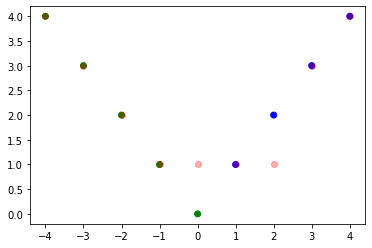

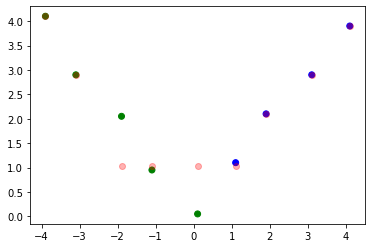

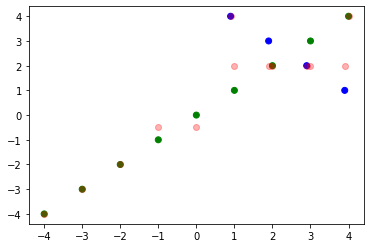

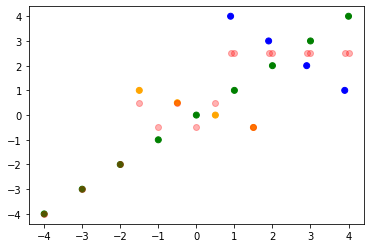

In [267]:
ex1_pred,modelTree1 = getModelTreePrediction(ex1, model, max_depth = 3)
ex2_pred,modelTree2 = getModelTreePrediction(ex2, model, max_depth = 3)
ex3_pred,modelTree3 = getModelTreePrediction(ex3, model, max_depth = 3)
ex4_pred,modelTree4 = getModelTreePrediction(ex4, model, max_depth = 3)

plotDataAndPredictions_simple(ex1, ex1_pred)
plotDataAndPredictions_simple(ex2, ex2_pred)
plotDataAndPredictions_simple(ex3, ex3_pred)
plotDataAndPredictions_simple(ex4, ex4_pred)

## Now plot the data points and the predictions for all possible input data (Xf and Xc)

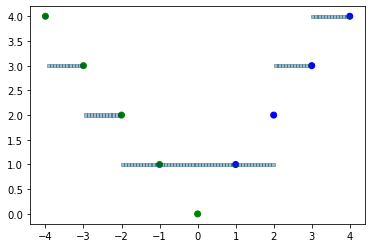

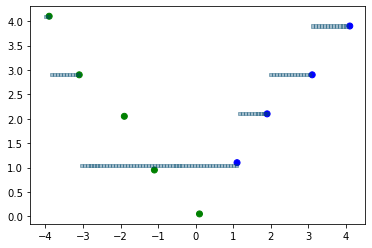

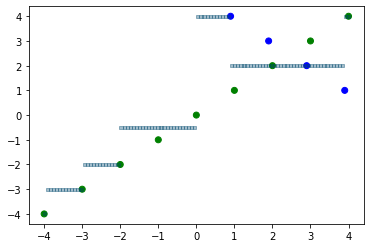

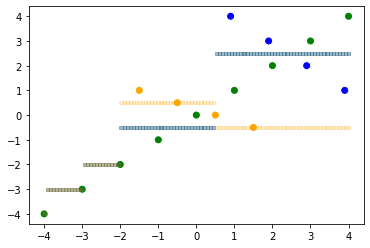

In [268]:
plotDataAndPredictions(ex1, modelTree1, True)
plotDataAndPredictions(ex2, modelTree2, True)
plotDataAndPredictions(ex3, modelTree3, True)
plotDataAndPredictions(ex4, modelTree4, True)

# Model Tree: linear regressor

In [269]:
model = linear_regr()

## First plot the data points and the corresponding predictions of the tree

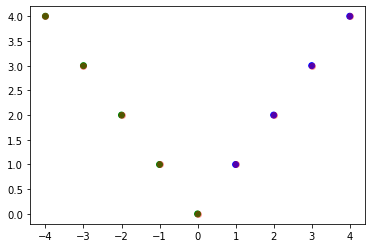

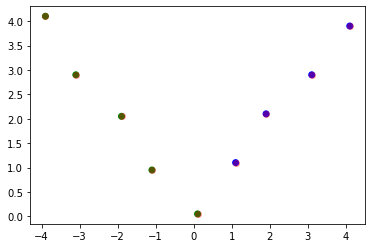

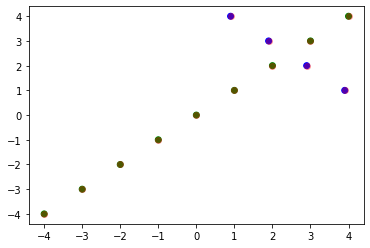

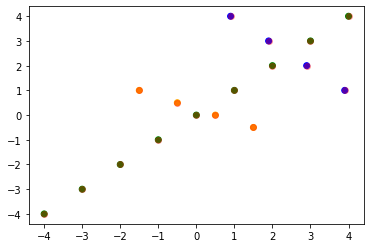

In [270]:
ex1_pred,modelTree1 = getModelTreePrediction(ex1, model, max_depth = 2)
ex2_pred,modelTree2 = getModelTreePrediction(ex2, model, max_depth = 2)
ex3_pred,modelTree3 = getModelTreePrediction(ex3, model, max_depth = 2)
ex4_pred,modelTree4 = getModelTreePrediction(ex4, model, max_depth = 2)

plotDataAndPredictions_simple(ex1, ex1_pred)
plotDataAndPredictions_simple(ex2, ex2_pred)
plotDataAndPredictions_simple(ex3, ex3_pred)
plotDataAndPredictions_simple(ex4, ex4_pred)

## Now plot the data points and the predictions for all possible input data (Xf and Xc)

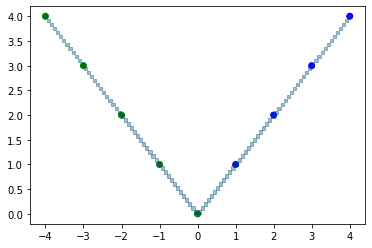

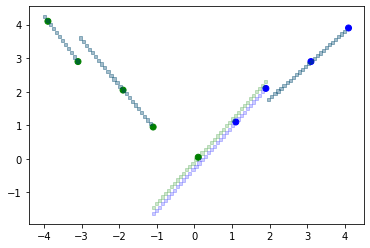

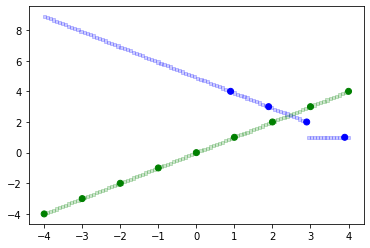

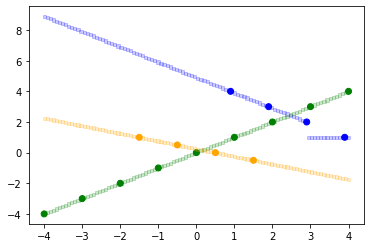

In [271]:
plotDataAndPredictions(ex1, modelTree1, True)
plotDataAndPredictions(ex2, modelTree2, True)
plotDataAndPredictions(ex3, modelTree3, True)
plotDataAndPredictions(ex4, modelTree4, True)

# Model Tree: SVM regressor

In [272]:
model = svm_regr()

## First plot the data points and the corresponding predictions of the tree

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

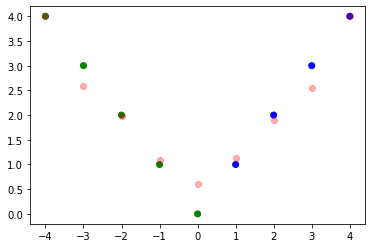

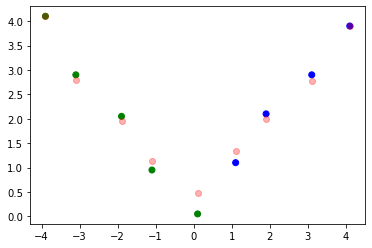

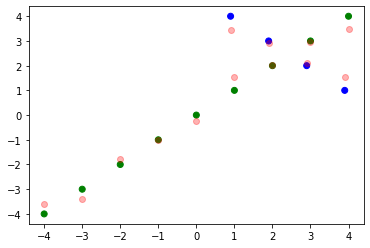

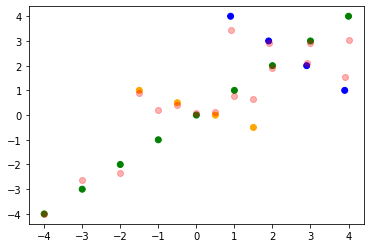

In [273]:
ex1_pred,modelTree1 = getModelTreePrediction(ex1, model, max_depth = 2)
ex2_pred,modelTree2 = getModelTreePrediction(ex2, model, max_depth = 2)
ex3_pred,modelTree3 = getModelTreePrediction(ex3, model, max_depth = 2)
ex4_pred,modelTree4 = getModelTreePrediction(ex4, model, max_depth = 2)

plotDataAndPredictions_simple(ex1, ex1_pred)
plotDataAndPredictions_simple(ex2, ex2_pred)
plotDataAndPredictions_simple(ex3, ex3_pred)
plotDataAndPredictions_simple(ex4, ex4_pred)

## Now plot the data points and the predictions for all possible input data (Xf and Xc)

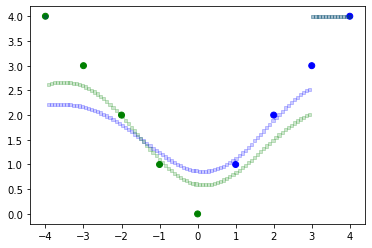

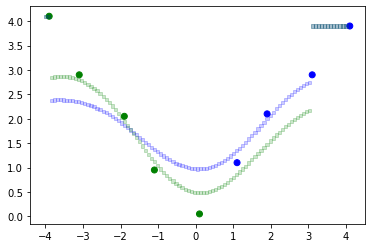

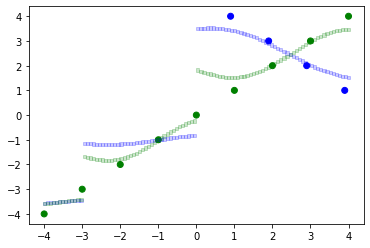

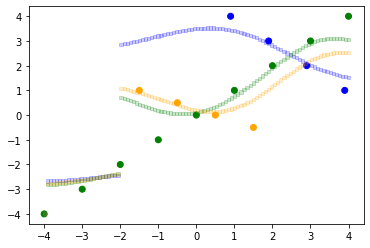

In [274]:
plotDataAndPredictions(ex1, modelTree1, True)
plotDataAndPredictions(ex2, modelTree2, True)
plotDataAndPredictions(ex3, modelTree3, True)
plotDataAndPredictions(ex4, modelTree4, True)